# **Predicting Pulsar Stars**
Brett Webb

Intro to Machine Learning - Project 1

Prof. Adam Forland

---
## **About the Data**
---
#### From the original author:
HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South). 

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. 

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class. At present multi-class labels are unavailable, given the costs associated with data annotation.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators. Each candidate is described by 8 continuous variables. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve. These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

HTRU 2 Summary
17,898 total examples.
1,639 positive examples.
16,259 negative examples.

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach MNRAS, 2016.

https://doi.org/10.6084/m9.figshare.3080389.v1

---


## **Initial Thinking**
---
When first discovering this dataset I was intrigued by it because it sounded so cool and scientific and I just had to know more. I was somewhat upset that the dataset was fairly small and that only a small percentage were actually concluded to be pulsar stars but I found the data to be interesting none the least. After some quick googling, I ended up finding the [website](http://www.scienceguyrob.com/) of the original author of this data and found his numerous publications and projects related to this field. I stumbled upon his 302 page thesis on "Why are Pulsars Hard to Find?" and I knew that there was a lot more to this subject than I had initially realized. I only read the abstract of his thesis but it essentially boils down to the same reason that is listed above, they are very hard to differentiate from RFI and noise. An increasing volume of data to be searched, and an increasing number of ‘candidate’ pulsar detections arising from that data, requiring analysis, are the other characteristics that make these predictions so difficult. We are constantly learning more and more about the universe every day as technology continues to evolve making it so that we are finding these potential pulsar candidates faster than they can be classified. In his thesis, he also proposes a new machine learning method, the GH-VFDT, and shows "that a significant improvement in selection performance can be achieved using the GH-VFDT, which utilises a learning procedure optimised for data characterised by skewed class distributions." He then goes to conclude that "the sub-optimal performance of existing selection systems, is due to a combination of poor feature design, insensitivity to noise, and an inability to deal with skewed class distributions." I didn't take the time to read all about his proposed new method, so let's implement one of those exisitng slection systems he was talking about!

---

## **Tools that we need**

I first import the neccesary libraries and modules needed to make this classification model. Pandas and Numpy are used for visualization and manipulation of the data, Matplotlib is used for plotting the results of the model, and Tensorflow is used to build, train, and evaluate the models.

In [1]:
import numpy as np
print("Numpy version:", np.__version__)

# Using to read data in from .csv file and to visualize it
import pandas as pd
print("Pandas version:", pd.__version__)

import matplotlib.pyplot as plt
import matplotlib
print("Matplotlib version:", matplotlib.__version__)

# This will allow us to load tensorflow and the layers from Keras.
import tensorflow as tf

from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout 

# Show the version of Tensorflow that we are using.
print("Tensorflow version:", tf.__version__ , "with Keras version:", tf.keras.__version__) 

Numpy version: 1.18.1
Pandas version: 1.0.1
Matplotlib version: 3.1.1
Tensorflow version: 2.1.0 with Keras version: 2.2.4-tf


---

## **Data Loading**

Here I load in the raw data and print it out to see the layout of the data. Then, I begin to split the data apart into the features and targets, and then again into the training and testing data. I use approximately an 80% split in the data for my training and testing data.

In [2]:
RAW_DATA_FRAME = pd.read_csv("pulsar_stars.csv")  # Load up all the data.
RAW_DATA_FRAME # Print data to visualize it

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [3]:
columns = ["Mean_IP", "StDev_IP", "Kurtosis_IP", "Skew_IP", "Mean_DMSNR", "StDev_DMSNR", "Kurtosis_DMSNR", "Skew_DMSNR", "Target"]
RAW_DATA_FRAME.columns = columns # Shorten column names to make them nicer to read

In [4]:
FEATURES = RAW_DATA_FRAME.iloc[:, 0:8] # Seperate features and targets
TARGETS = RAW_DATA_FRAME.iloc[:, 8:9]

In [5]:
split = 14300 # 12500 ~ 70%, 14300 ~ 80%
x_train = np.array(FEATURES.iloc[0:split]) # Training features.
y_train = np.array(TARGETS.iloc[0:split]) # Training targets.

x_test = np.array(FEATURES.iloc[split:]) # Testing features.
y_test = np.array(TARGETS.iloc[split:]) # Testing targets.

In [6]:
# Checking the shape of the training features.
print("The shape of the training data:", np.shape(x_train))
x_train[1] # Looking at one of the datum.

The shape of the training data: (14300, 8)


array([102.5078125 ,  58.88243001,   0.46531815,  -0.51508791,
         1.67725752,  14.86014572,  10.57648674, 127.3935796 ])

---

## **Network construction and training**

Here is where I build and train the model. I have used a simple feed forward neural network that has two dense layers with rectified linear activation functions, a dropout layer with a 20% dropout to prevent overfitting, and a final dense layer with a sigmoid activation function. Using the sigmoid function in the output layer will output a value between 0 and 1 which is the target that I am looking for. A 0 represents a negative result, meaning the data is not a pulsar star, and a 1 represents a postive result, a confirmed pulsar star. I used 200 epochs for training the model because after numerous tests, it seemed to be the sweet spot for this model.

In [90]:
model = Sequential(name="Pulsar_Prediction_Model") # Sequential model (all the models that we build will be)
model.add(Dense(100, activation="relu", input_shape=(8,), name="Input")) # Dense layer with rectified linear activation.
model.add(Dense(50, activation="relu", name="Hidden")) # Dense layer with rectified linear activation.
model.add(Dropout(.2, name="Dropout"))
model.add(Dense(1, activation="sigmoid", name="Output")) # Dense layer with sigmoid activation.

In [91]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(), # This is a binary classification model, meaning our targets are 0 or 1
              metrics=['accuracy']) # Train the model for accuracy

In [92]:
model.summary() # Display a summary of the model to see the layers and shape

Model: "Pulsar_Prediction_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 100)               900       
_________________________________________________________________
Hidden (Dense)               (None, 50)                5050      
_________________________________________________________________
Dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
Output (Dense)               (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


In [93]:
epochs = 200

# Train the model.
history = model.fit(x = x_train,
                    y = y_train,
                    epochs = epochs, # Number of passes through all the data.
                    batch_size = 100, # If unspecified, batch_size will default to 32.
                    validation_data = (x_test, y_test)) # Data on which to evaluate the loss at the end of each epoch.

Train on 14300 samples, validate on 3598 samples
Epoch 1/500
14300/14300 [==============================] - 1s 52us/sample - loss: 0.5585 - accuracy: 0.9200 - val_loss: 0.0512 - val_accuracy: 0.9911
Epoch 2/500
14300/14300 [==============================] - 0s 33us/sample - loss: 0.1361 - accuracy: 0.9648 - val_loss: 0.0460 - val_accuracy: 0.9892
Epoch 3/500
14300/14300 [==============================] - 0s 33us/sample - loss: 0.1169 - accuracy: 0.9685 - val_loss: 0.0450 - val_accuracy: 0.9906
Epoch 4/500
14300/14300 [==============================] - 0s 33us/sample - loss: 0.1083 - accuracy: 0.9690 - val_loss: 0.0344 - val_accuracy: 0.9908
Epoch 5/500
14300/14300 [==============================] - 0s 32us/sample - loss: 0.1050 - accuracy: 0.9708 - val_loss: 0.0442 - val_accuracy: 0.9875
Epoch 6/500
14300/14300 [==============================] - 0s 33us/sample - loss: 0.1020 - accuracy: 0.9703 - val_loss: 0.0424 - val_accuracy: 0.9908
Epoch 7/500
14300/14300 [==========================

---

## **Results**

Here is where I show the results of the model. I show the loss and accuracy of evaluating the model using the testing data that we created earlier. A 98.9% accuracy against the testing data, that's awesome! I was very surprised with the results of the model to see that it performed so well. I began thinking to myself, "is it really that easy to classify pulsar stars using this data?" From my previous research, I learned that it was very hard to classify pulsar stars, so why was my model so accurate?

In [ ]:
# To recreate me results, uncomment the following line of code to load the model that I trained
# model = load_model("model_prediction_uneven")

3598/3598 [==============================] - 0s 38us/sample - loss: 0.0466 - accuracy: 0.9900

Test loss: 0.04664396888898968
Test accuracy: 0.98999447


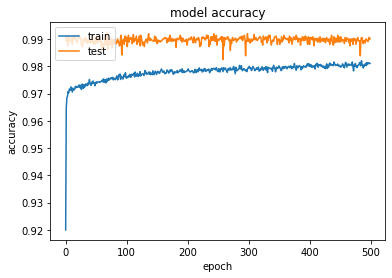

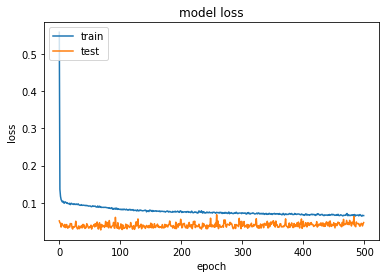

In [96]:
score = model.evaluate(x_test, y_test)
print("\nTest loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# This cell will save the model to the directory that the notebook is running in.
# Be sure to not overwrite the already trained model! I leave this commented out just in case.
# save_model(model, "./model_prediction_uneven",save_format='tf')

W0430 22:02:08.532885 139743136520000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


---

## **Further Thinking**

The initial results of my first model were just too good to be true, I knew that something was not right. I experimented with numerous combinations of activation functions, dropout levels, layer sizes, anything I could think of to see if I could get different results. After many attempts, the accuracy of the model stayed anywhere in the range from 95% to 99%. There became a point where it was upsetting to such a high accuracy for the model. This led to a few additional thoughts; either the model really was that accurate and I should be happy about it, the data was too easy to predict and the author had no idea what he was talking about, or there was still something wrong going on that I wasn't seeing. So, I turned to my professor, Adam Forland, for help.

He too at first was excited to see that my model was performing so well until I told him what I kept observing over and over again. After going through the code and seeing that everything seemed to be functioning properly, we dialed back out focus a big and began to look at the data. Out of almost 18,000 datum, only just over 1,600 are positive pulsar stars. This means that more than 90% of the data has a target of 0, a negative classification. The model could just output a 0 for every datum and get a 90% accuracy reading. That's what the large spike in the graphs could be as well, the model could have learned the distrubtion of the data and knew that it could almost guess every time and get a decent result. So after talking through some possibilities for where to go next, Adam provided me with two ideas that sounded somewhat promising, deflating the negative results so that there is a 50-50 split among the data between results, or inflating the already positive results to the number of negative results.

---

## **Deflating the Negative Data**

The first approach I took was to deflate the negative results so there was an even number of positive and negative results to train with. Now instead of having almost 18,000 datum, there would only be about 3,200 total datum. I begin by splitting the data into it's respective targets and then perform a random sampling of the negative targets to obtain the same number of negative targets as postive targets. I concatenate the data frames together, shuffle the data so that it is all nice and mixed, and I repeat the same process as I had done before except with one minor change. Instead of creating a brand new model, I use the already trained "uneven model" as I began to call it, and decided to retrain the model and test it with this new deflated data set.

In [100]:
pos_targets = RAW_DATA_FRAME.loc[RAW_DATA_FRAME["Target"] == 1] # Creates a new data frame of only postive targets
neg_targets = RAW_DATA_FRAME.loc[RAW_DATA_FRAME["Target"] == 0] # Creates a new data frame of only negative targets

# Randomly sample the negative data of the sae size of the positive data, random_state is used for reproducibility
sample_neg = neg_targets.sample(n=pos_targets.shape[0], axis=0, random_state=1)
deflated_neg = pd.concat([pos_targets, sample_neg]) # Concatenate the positive data and the sampled data
# Shuffles the data and resets the index values, random_state is used for reproducibility
deflated_neg = deflated_neg.sample(frac=1, random_state=1).reset_index(drop=True) 

In [101]:
deflated_features = deflated_neg.iloc[:, 0:8] # Seperate features and targets
deflated_targets = deflated_neg.iloc[:, 8:9]

split = 2600 # 2300 ~ 70%, 2600 ~ 80%
x_deflated_train = np.array(deflated_features.iloc[0:split]) # Training features.
y_deflated_train = np.array(deflated_targets.iloc[0:split]) # Training targets.

x_deflated_test = np.array(deflated_features.iloc[split:]) # Testing features.
y_deflated_test = np.array(deflated_targets.iloc[split:]) # Testing targets.

In [7]:
deflated_uneven_model = load_model("model_prediction_uneven") # Load in the uneven model
deflated_uneven_model.summary()

Model: "Pulsar_Prediction_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 100)               900       
_________________________________________________________________
Hidden (Dense)               (None, 50)                5050      
_________________________________________________________________
Dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
Output (Dense)               (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


### **Pre-test**

I decided to perform a "pre-test" on the model to see what the accuracy of the model would be before training the model. A 90% accuracy, just like I had discussed before, was the model just guessing at this point? Would retraining the model with this new data provide any new results?

In [103]:
pre_score = deflated_uneven_model.evaluate(x_deflated_test, y_deflated_test)
print("\nPre-deflated test loss:", pre_score[0])
print("Pre-deflated test accuracy:", pre_score[1])

678/678 [==============================] - 0s 130us/sample - loss: 0.2843 - accuracy: 0.9071

Pre-deflated test loss: 0.2842762159035269
Pre-deflated test accuracy: 0.90707964


In [110]:
epochs = 200

# Uses the uneven model and trains it on the deflated data
deflated_uneven_history = deflated_uneven_model.fit(x = x_deflated_train,
                                                    y = y_deflated_train,
                                                    epochs = epochs, # Number of passes through all the data.
                                                    batch_size = 50, # If unspecified, batch_size will default to 32.
                                                    validation_data = (x_deflated_test, y_deflated_test)) # Data on which to evaluate the loss at the end of each epoch.

Train on 2600 samples, validate on 678 samples
Epoch 1/200
2600/2600 [==============================] - 0s 76us/sample - loss: 0.1132 - accuracy: 0.9596 - val_loss: 0.2753 - val_accuracy: 0.9351
Epoch 2/200
2600/2600 [==============================] - 0s 70us/sample - loss: 0.1044 - accuracy: 0.9619 - val_loss: 0.3142 - val_accuracy: 0.9366
Epoch 3/200
2600/2600 [==============================] - 0s 69us/sample - loss: 0.1049 - accuracy: 0.9612 - val_loss: 0.2866 - val_accuracy: 0.9410
Epoch 4/200
2600/2600 [==============================] - 0s 67us/sample - loss: 0.1099 - accuracy: 0.9612 - val_loss: 0.2420 - val_accuracy: 0.9469
Epoch 5/200
2600/2600 [==============================] - 0s 72us/sample - loss: 0.1080 - accuracy: 0.9577 - val_loss: 0.3082 - val_accuracy: 0.9351
Epoch 6/200
2600/2600 [==============================] - 0s 68us/sample - loss: 0.0988 - accuracy: 0.9608 - val_loss: 0.2585 - val_accuracy: 0.9469
Epoch 7/200
2600/2600 [==============================] - 0s 62us/

---

## **Results - Deflated Data**

The results don't look too promising for the deflated data. The accuracy however seems to have gotten better from the pretest, increasing up to 93-94% from 90% and the accuracy of the training data seems to on an upward trend as well. The graphs of the results of this data do not seem to help very much because the are so crazy and all over the place. This leads me to believe that deflating the data did not seem to help.

678/678 [==============================] - 0s 45us/sample - loss: 0.2834 - accuracy: 0.9336

Deflated test loss: 0.2833582915387674
Deflated test accuracy: 0.9336283


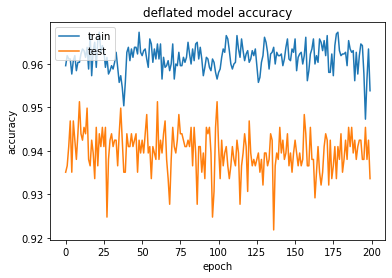

<function matplotlib.pyplot.show(*args, **kw)>

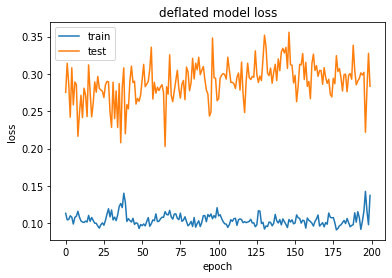

In [111]:
deflated_uneven_score = deflated_uneven_model.evaluate(x_deflated_test, y_deflated_test)
print("\nDeflated test loss:", deflated_uneven_score[0])
print("Deflated test accuracy:", deflated_uneven_score[1])

plt.plot(deflated_uneven_history.history['accuracy'])
plt.plot(deflated_uneven_history.history['val_accuracy'])
plt.title('deflated model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(deflated_uneven_history.history['loss'])
plt.plot(deflated_uneven_history.history['val_loss'])
plt.title('deflated model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

---

## **Inflating the Positive Data**

A very similar process to what I had done when deflating the negative values. This time however, I duplicate the positive data so that there is 10 times the amount of it to almost match the number of negative data. Now, there are over 32,000 datum to the data set.

In [114]:
pos_targets = RAW_DATA_FRAME.loc[RAW_DATA_FRAME["Target"] == 1] # Creates a new data frame of only postive targets
neg_targets = RAW_DATA_FRAME.loc[RAW_DATA_FRAME["Target"] == 0] # Creates a new data frame of only negative targets

inflated_pos = pos_targets # Copy the positive data
for i in range(9): # Inflate the positive data to 10 times the original size by copying the data
    inflated_pos = pd.concat([inflated_pos, pos_targets])

inflated_pos = pd.concat([inflated_pos, neg_targets]) # Combine the inflated positive data and the negative data
# Shuffles the data and resets the index values, random_state is used for reproducibility
inflated_pos = inflated_pos.sample(frac=1, random_state=1).reset_index(drop=True) 

In [115]:
inflated_features = inflated_pos.iloc[:, 0:8] # Seperate features and targets
inflated_targets = inflated_pos.iloc[:, 8:9]

split = 26000 # 23000 ~ 70%, 26000 ~ 80%
x_inflated_train = np.array(inflated_features.iloc[0:split]) # Training features.
y_inflated_train = np.array(inflated_targets.iloc[0:split]) # Training targets.

x_inflated_test = np.array(inflated_features.iloc[split:]) # Testing features.
y_inflated_test = np.array(inflated_targets.iloc[split:]) # Testing targets.

In [116]:
inflated_uneven_model = load_model("model_prediction_uneven")
inflated_uneven_model.summary()

Model: "Pulsar_Prediction_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 100)               900       
_________________________________________________________________
Hidden (Dense)               (None, 50)                5050      
_________________________________________________________________
Dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
Output (Dense)               (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


## **Pre-test**

Like what was seen before in the pretest for the deflated model, an accuracy score of 90%. The suspicion grows that the model is just outputting 0s left and right.

In [117]:
pre_score = inflated_uneven_model.evaluate(x_inflated_test, y_inflated_test)
print("\nPre-inflated test loss:", pre_score[0])
print("Pre-inflated test accuracy:", pre_score[1])

6649/6649 [==============================] - 0s 33us/sample - loss: 0.2903 - accuracy: 0.9078

Pre-inflated test loss: 0.29025949775536164
Pre-inflated test accuracy: 0.9078057


In [29]:
epochs = 200

# Uses the uneven model and trains it on the inflated data
inflated_uneven_history = inflated_uneven_model.fit(x = x_inflated_train,
                                                    y = y_inflated_train,
                                                    epochs = epochs, # Number of passes through all the data.
                                                    batch_size = 100, # If unspecified, batch_size will default to 32.
                                                    validation_data = (x_inflated_test, y_inflated_test)) # Data on which to evaluate the loss at the end of each epoch.

Train on 26000 samples, validate on 6649 samples
Epoch 1/200
26000/26000 [==============================] - 1s 50us/sample - loss: 0.1628 - accuracy: 0.9442 - val_loss: 0.1568 - val_accuracy: 0.9436
Epoch 2/200
26000/26000 [==============================] - 1s 35us/sample - loss: 0.1571 - accuracy: 0.9452 - val_loss: 0.1500 - val_accuracy: 0.9484
Epoch 3/200
26000/26000 [==============================] - 1s 34us/sample - loss: 0.1545 - accuracy: 0.9465 - val_loss: 0.1495 - val_accuracy: 0.9463
Epoch 4/200
26000/26000 [==============================] - 1s 35us/sample - loss: 0.1556 - accuracy: 0.9457 - val_loss: 0.1539 - val_accuracy: 0.9466
Epoch 5/200
26000/26000 [==============================] - 1s 34us/sample - loss: 0.1543 - accuracy: 0.9460 - val_loss: 0.1544 - val_accuracy: 0.9451
Epoch 6/200
26000/26000 [==============================] - 1s 35us/sample - loss: 0.1520 - accuracy: 0.9482 - val_loss: 0.1531 - val_accuracy: 0.9460
Epoch 7/200
26000/26000 [==========================

---

## **Results - Inflated Data**

The results from this model look to be much nicer. Nice and steady growth can be seen in the accuracy for both the training and testing data and a steady decrease in the loss can be seen as well. This seems to show that the model is learning as it goes. The one caviat to this data is that it is the same positive data values, just multiplied by 10, so this could give a certain bias to the data. Maybe in doing this, it is forcng the network to learn better what it is that we want to predict? Maybe the 95% accuracy of this model is accurate?

6649/6649 [==============================] - 0s 37us/sample - loss: 0.1260 - accuracy: 0.9538

Inflated test loss: 0.12603431337443416
Inflated test accuracy: 0.9538276


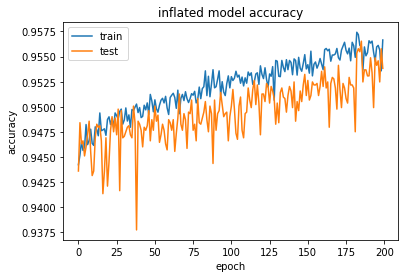

<function matplotlib.pyplot.show(*args, **kw)>

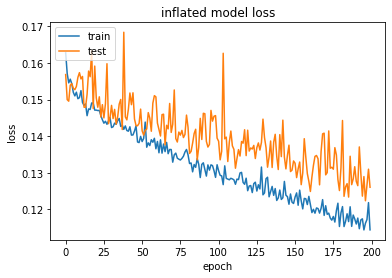

In [33]:
inflated_uneven_score = inflated_uneven_model.evaluate(x_inflated_test, y_inflated_test)
print("\nInflated test loss:", inflated_uneven_score[0])
print("Inflated test accuracy:", inflated_uneven_score[1])

plt.plot(inflated_uneven_history.history['accuracy'])
plt.plot(inflated_uneven_history.history['val_accuracy'])
plt.title('inflated model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(inflated_uneven_history.history['loss'])
plt.plot(inflated_uneven_history.history['val_loss'])
plt.title('inflated model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

---
## **A Deeper Dive**

After seeing the previous results of inflating and deflating the data, I thought I would be done and I could write a nice conclusion to wrap up with project, but my brain had another crazy idea. Did using the pre-trained weights from the uneven model or the new data bias the results in any way? In my mind, my thoughts were that the model had already seent that exact same data, just in a different form, so wouldn't it already do a fairly good job with it? So, I decided to create two brand new "fresh" models as I call them and train them with the inflated and deflated data to see if the results would change. I created the exact same model as I had done before for both sets of data and began testing. Results are dicussed after the inflated model.

---

## **Fresh Deflated Negative Data Model**

In [80]:
deflated_model = Sequential(name="Pulsar_Prediction_Model") # Sequential model (all the models that we build will be)
deflated_model.add(Dense(100, activation="relu", input_shape=(8,), name="Input")) # Dense layer with rectified linear activation.
deflated_model.add(Dense(50, activation="relu", name="Hidden")) # Dense layer with rectified linear activation.
deflated_model.add(Dropout(.2, name="Dropout"))
deflated_model.add(Dense(1, activation="sigmoid", name="Output")) # Dense layer with sigmoid activation.

deflated_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

deflated_model.summary()

Model: "Pulsar_Prediction_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 100)               900       
_________________________________________________________________
Hidden (Dense)               (None, 50)                5050      
_________________________________________________________________
Dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
Output (Dense)               (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


In [81]:
epochs = 200

deflated_history = deflated_model.fit(x = x_deflated_train,
                                      y = y_deflated_train,
                                      epochs = epochs, # Number of passes through all the data.
                                      batch_size = 50, # If unspecified, batch_size will default to 32.
                                      validation_data = (x_deflated_test, y_deflated_test)) # Data on which to evaluate the loss at the end of each epoch.

Train on 2600 samples, validate on 678 samples
Epoch 1/200
2600/2600 [==============================] - 0s 170us/sample - loss: 1.0938 - accuracy: 0.7981 - val_loss: 0.2352 - val_accuracy: 0.9277
Epoch 2/200
2600/2600 [==============================] - 0s 63us/sample - loss: 0.3685 - accuracy: 0.8838 - val_loss: 0.2559 - val_accuracy: 0.9174
Epoch 3/200
2600/2600 [==============================] - 0s 64us/sample - loss: 0.2943 - accuracy: 0.8996 - val_loss: 0.2095 - val_accuracy: 0.9263
Epoch 4/200
2600/2600 [==============================] - 0s 62us/sample - loss: 0.2516 - accuracy: 0.9092 - val_loss: 0.1916 - val_accuracy: 0.9277
Epoch 5/200
2600/2600 [==============================] - 0s 62us/sample - loss: 0.2406 - accuracy: 0.9123 - val_loss: 0.1934 - val_accuracy: 0.9425
Epoch 6/200
2600/2600 [==============================] - 0s 67us/sample - loss: 0.2445 - accuracy: 0.9127 - val_loss: 0.1950 - val_accuracy: 0.9159
Epoch 7/200
2600/2600 [==============================] - 0s 66us

678/678 [==============================] - 0s 44us/sample - loss: 0.1612 - accuracy: 0.9425

Fresh Deflated test loss: 0.16122633658327537
Fresh Deflated test accuracy: 0.9424779


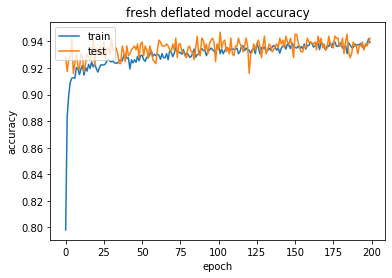

<function matplotlib.pyplot.show(*args, **kw)>

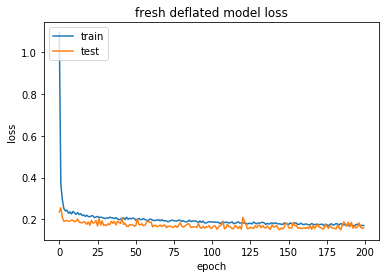

In [82]:
deflated_score = deflated_model.evaluate(x_deflated_test, y_deflated_test)
print("\nFresh Deflated test loss:", deflated_score[0])
print("Fresh Deflated test accuracy:", deflated_score[1])

plt.plot(deflated_history.history['accuracy'])
plt.plot(deflated_history.history['val_accuracy'])
plt.title('fresh deflated model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(deflated_history.history['loss'])
plt.plot(deflated_history.history['val_loss'])
plt.title('fresh deflated model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [86]:
# This cell will save the model to the directory that the notebook is running in. Uncommented to prevent overwriting.
# save_model(deflated_model, "./model_prediction_deflated",save_format='tf')

---

## **Fresh Inflated Positive Data Model**

In [83]:
inflated_model = Sequential(name="Pulsar_Prediction_Model") # Sequential model (all the models that we build will be)
inflated_model.add(Dense(100, activation="relu", input_shape=(8,), name="Input")) # Dense layer with rectified linear activation.
inflated_model.add(Dense(50, activation="relu", name="Hidden")) # Dense layer with rectified linear activation.
inflated_model.add(Dropout(.2, name="Dropout"))
inflated_model.add(Dense(1, activation="sigmoid", name="Output")) # Dense layer with sigmoid activation.

inflated_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

inflated_model.summary()

Model: "Pulsar_Prediction_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 100)               900       
_________________________________________________________________
Hidden (Dense)               (None, 50)                5050      
_________________________________________________________________
Dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
Output (Dense)               (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


In [84]:
epochs = 200

inflated_history = inflated_model.fit(x = x_inflated_train,
                                      y = y_inflated_train,
                                      epochs = epochs, # Number of passes through all the data.
                                      batch_size = 50, # If unspecified, batch_size will default to 32.
                                      validation_data = (x_inflated_test, y_inflated_test)) # Data on which to evaluate the loss at the end of each epoch.

Train on 26000 samples, validate on 6649 samples
Epoch 1/200
26000/26000 [==============================] - 2s 65us/sample - loss: 0.3486 - accuracy: 0.8982 - val_loss: 0.2001 - val_accuracy: 0.9254
Epoch 2/200
26000/26000 [==============================] - 1s 57us/sample - loss: 0.2100 - accuracy: 0.9240 - val_loss: 0.2005 - val_accuracy: 0.9253
Epoch 3/200
26000/26000 [==============================] - 1s 57us/sample - loss: 0.2090 - accuracy: 0.9242 - val_loss: 0.2067 - val_accuracy: 0.9233
Epoch 4/200
26000/26000 [==============================] - 1s 55us/sample - loss: 0.2001 - accuracy: 0.9270 - val_loss: 0.2066 - val_accuracy: 0.9250
Epoch 5/200
26000/26000 [==============================] - 1s 56us/sample - loss: 0.1966 - accuracy: 0.9293 - val_loss: 0.2016 - val_accuracy: 0.9275
Epoch 6/200
26000/26000 [==============================] - 2s 60us/sample - loss: 0.1958 - accuracy: 0.9284 - val_loss: 0.1856 - val_accuracy: 0.9307
Epoch 7/200
26000/26000 [==========================

6649/6649 [==============================] - 0s 42us/sample - loss: 0.1414 - accuracy: 0.9517

Fresh Inflated test loss: 0.1413701562697519
Fresh Inflated test accuracy: 0.9517221


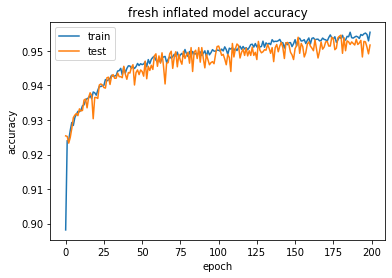

<function matplotlib.pyplot.show(*args, **kw)>

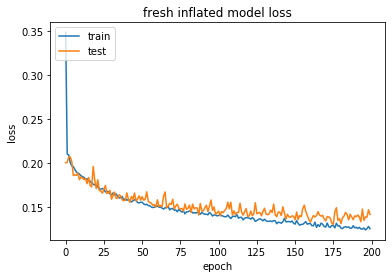

In [85]:
inflated_score = inflated_model.evaluate(x_inflated_test, y_inflated_test)
print("\nFresh Inflated test loss:", inflated_score[0])
print("Fresh Inflated test accuracy:", inflated_score[1])

plt.plot(inflated_history.history['accuracy'])
plt.plot(inflated_history.history['val_accuracy'])
plt.title('fresh inflated model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(inflated_history.history['loss'])
plt.plot(inflated_history.history['val_loss'])
plt.title('fresh inflated model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [87]:
# This cell will save the model to the directory that the notebook is running in. Uncommented to prevent overwriting.
# save_model(inflated_model, "./model_prediction_inflated",save_format='tf')

---

## **Results - Fresh Models**

These two fresh models were built and trained in the exact fashion as the previous models, however they do seem to be a bit more promising than the others. Both do sit around 94-95% accuracy which almost matches the accuracy of the uneven models that were trained with the deflated and inflated data which is quite perculiar. I feel though that these models are more accurate because of the data being more evenly split between positive and negative targets and there was no bias in the starting weights. I feel like the skewed distribution of the data threw off the first model and made it wildly inaccurate. 

---

## **Conclusion**

I have posed numerous questions throughout this project, for my own curiousity sake but also about the accuracy of my models. Were my models actually good at predicting pulsar stars or were they just guessing randomly. Due to my knowledge of and the complexity of the subject, I can not definitively conclude that my models were learning. I believe however that the two fresh models that I created are the best ones due to the distribution of the training data. I also believe however that to a certain degree, the models that I created were learning and were classifying correctly. I suppose the only true way to know this would be to obtain more data and do even more tests. But this does fit outside the scope of this project, and I believe it is best left to the professionals like Dr. Rob Lyon. Maybe some day with an even larger number of data samples, I can make a definitive conclusion on these models.

I feel like this project has greatly increased my knowledge of basic machine learning techniques and has shown me numerous techniques and schools of thought when it comes to similar situations. I greatly enjoyed this project and do wish to continue on this path to learn even more about machine learning and to see where it takes us in the future.


(Post-conclusion testing: I have debated on whether or not to include this but I perfermed some tests that I believe show that my models were learning! It's too late to include anything, and more testing is surely needed to be done, but it's pretty exciting!)

---